### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ
#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

# ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6
# Деревья решений
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Пономарева Л. М.
##### Группа:   НПИбд-02-19

### Москва 2022

#### Вариант 12 

Echocardiogram Data Set 

Название файла: echocardiogram.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Echocardiogram 

Класс: still-alive (столбец No 2) 

Метод обработки пропущенных значений – медиана признака 

Метод нормализации признаков – нормировка по норме L1 

Алгоритм снижения размерности данных – метод главных компонент (PCA) 

Дополнительные базовые классификаторы: 

- классификатор LDA 

- классификатор метода опорных векторов с полиномиальной зависимостью (degree=2) 

Комбинированный классификатор: StackingClassifier 

Ансамблевые классификаторы: AdaBoostClassifier, GradientBoostingClassifier 

Показатель качества модели – точность (precision) 

#### Задание 1
Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов. 

In [1]:
import pandas as pd

# считываем данные в объект DataFrame
my_data = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data", header=None, error_bad_lines=False)
my_data

b'Skipping line 50: expected 13 fields, saw 14\n'


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
127,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
128,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
129,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


#### Задание 2
Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании.

*Метод обработки пропущенных значений – медиана признака*

Нет пропущенных значений среди меток. Всего 2 класса:

In [2]:
my_data[1].unique()

array([0, 1], dtype=int64)

In [3]:
y = my_data[1].to_numpy()

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 13 columns):
0     131 non-null object
1     131 non-null int64
2     131 non-null object
3     131 non-null int64
4     131 non-null object
5     131 non-null object
6     131 non-null object
7     131 non-null object
8     131 non-null object
9     131 non-null object
10    131 non-null object
11    131 non-null object
12    131 non-null object
dtypes: int64(2), object(11)
memory usage: 13.4+ KB


Много нечисловых признаков из-за пропущенных значений, но есть один категориальный признак, который при этом не имеет какого-либо смысла:

In [5]:
my_data[10].unique()

array(['name'], dtype=object)

Удалим его.

In [6]:
my_data = my_data.drop(10, axis=1)
my_data

,0,1,2,3,4,5,6,7,8,9,11,12
0,11,0,71,0,0.260,9,4.600,14,1,1,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,?,?
127,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,?,?
128,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,?,?
129,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,?,?


Преобразуем все пропущенные значения отмеченные знаком вопроса на NaN. И заменим их на медианные значения признака.

In [7]:
import numpy as np

my_data = my_data.replace('?', np.NaN)
my_data = my_data.fillna(my_data.median())
my_data

,0,1,2,3,4,5,6,7,8,9,11,12
0,11,0,71,0,0.260,9,4.600,14,1,1,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,2,0
127,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,2,0
128,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,2,0
129,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,2,0


Преобразуем все строковые данные в числовые:

In [8]:
my_data[11].unique()

array(['1', '2', 2.0], dtype=object)

In [9]:
my_data[12].unique()

array(['0', '1', 0.0], dtype=object)

In [10]:
my_data = my_data.astype('float')
my_data = my_data.astype({1:'int64', 3:'int64', 11:'int64', 12:'int64'})
my_data.dtypes

0     float64
1       int64
2     float64
3       int64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
11      int64
12      int64
dtype: object

#### Задание 3
Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных пять признаков.

*Алгоритм снижения размерности данных – метод главных компонент (PCA)*

In [11]:
from sklearn.decomposition import PCA 

my_data = my_data.drop(1, axis=1)

pca = PCA(n_components=5)
fit = pca.fit(my_data)
features = fit.transform(my_data)
n_pcs= fit.components_.shape[0]

most_important = [np.abs(fit.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['survival', 'age-at-heart-attack', 'pericardial-effusion', ' fractional-shortening',
                  'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'group', 'alive-at-1']

most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['survival', 'age-at-heart-attack', 'epss', 'wall-motion-score', 'lvdd']

In [12]:
print( "*** Дисперсии компонент:\n", pca.explained_variance_ratio_ )

*** Дисперсии компонент:
 [0.6653095  0.16284808 0.12014505 0.0493641  0.0009703 ]


#### Задание 4
Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

*Метод нормализации признаков – нормировка по норме L1*

In [13]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l1').fit(features)
X = scaler.transform(features)

print(X[0:5,:])

[[-4.98633521e-01 -3.16202913e-01 -1.73917476e-01  6.91004800e-03
  -4.33604232e-03]
 [-1.70131281e-01 -4.75233156e-01 -2.56247493e-01  8.03520692e-02
  -1.80360011e-02]
 [-1.60856816e-01  3.09182139e-01 -4.20017482e-01  7.93968224e-02
  -3.05467408e-02]
 [ 7.58598973e-01 -2.05663605e-02  1.49515748e-01  7.10966409e-02
   2.22277541e-04]
 [-1.94432153e-01  3.55095726e-01  4.20320699e-01 -8.57419598e-03
   2.15772249e-02]]


#### Задание 5
Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

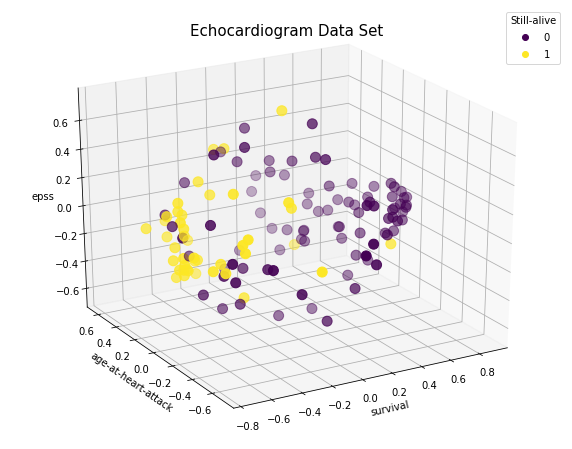

In [14]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = X[:,2]
scatter = ax.scatter( xs, ys, zs, c=y,s=100 )
ax.set_xlabel(most_important_names[0])
ax.set_ylabel(most_important_names[1])
ax.set_zlabel(most_important_names[2])
ax.set_title('Echocardiogram Data Set',fontsize=15)
ax.legend(*scatter.legend_elements(), loc="upper right", title = 'Still-alive')
ax.view_init( azim=-120, elev=25 );

#### Задание 6
Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((91, 5), (91,), (40, 5), (40,))

Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5:

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)  
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.8

Визуализируем границу принятия решений

In [17]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    x0_r = x0.ravel()
    x2 = X[:,2].reshape(-1, 1)
    x2 = np.full(len(x0_r), x2.mean())
    x3 = X[:,3].reshape(-1, 1)
    x3 = np.full(len(x0_r), x3.mean())
    x4 = X[:,4].reshape(-1, 1)
    x4 = np.full(len(x0_r), x4.mean())
    X_new = np.c_[x0_r, x1.ravel(), x2, x3, x4]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

Используем два признака с наиболее высокой оценкой важности.

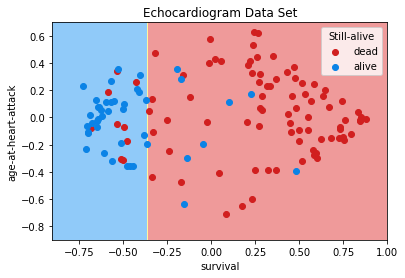

In [18]:
plot_decision_boundary(dt_clf, axis=[-0.9, 1, -0.9, 0.7])
plt.scatter(X[y==0,0], X[y==0,1], color='#d11f1f', label='dead')
plt.scatter(X[y==1,0], X[y==1,1], color='#0b83e6', label='alive')
plt.title('Echocardiogram Data Set')
plt.xlabel(most_important_names[0])
plt.ylabel(most_important_names[1])
plt.legend(title='Still-alive')
plt.show()

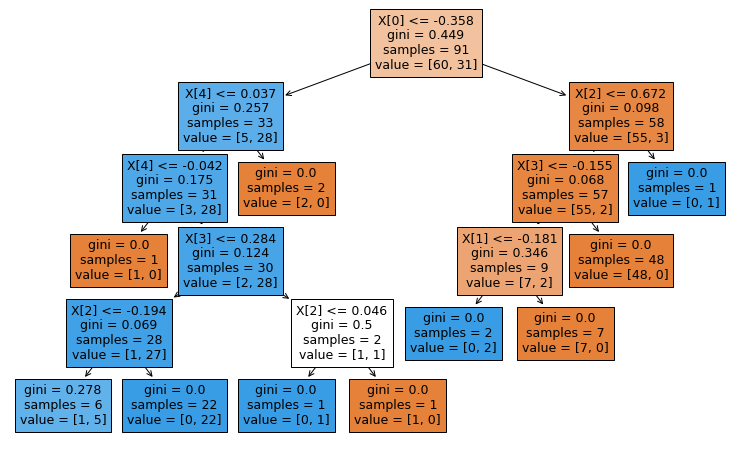

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(13, 8))
plot_tree(dt_clf,filled=True); 

#### Задание 7
Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 

*Дополнительные базовые классификаторы:* 

- *классификатор LDA* 

- *классификатор метода опорных векторов с полиномиальной зависимостью (degree=2)* 

*Комбинированный классификатор: StackingClassifier*

*Показатель качества модели – точность (precision)*

Классификатор LDA

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_lda = lda.predict(X_test)

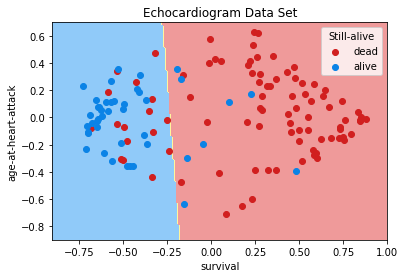

In [21]:
plot_decision_boundary(lda, axis=[-0.9, 1, -0.9, 0.7])
plt.scatter(X[y==0,0], X[y==0,1], color='#d11f1f', label='dead')
plt.scatter(X[y==1,0], X[y==1,1], color='#0b83e6', label='alive')
plt.title('Echocardiogram Data Set')
plt.xlabel(most_important_names[0])
plt.ylabel(most_important_names[1])
plt.legend(title='Still-alive')
plt.show()

Классификатор метода опорных векторов с полиномиальной зависимостью (degree=2)

In [22]:
from sklearn.svm import SVC

svc = SVC(kernel='poly', degree=2, C=10)

svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)

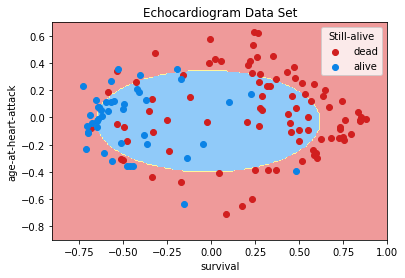

In [23]:
plot_decision_boundary(svc, axis=[-0.9, 1, -0.9, 0.7])
plt.scatter(X[y==0,0], X[y==0,1], color='#d11f1f', label='dead')
plt.scatter(X[y==1,0], X[y==1,1], color='#0b83e6', label='alive')
plt.title('Echocardiogram Data Set')
plt.xlabel(most_important_names[0])
plt.ylabel(most_important_names[1])
plt.legend(title='Still-alive')
plt.show()

Построим из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор

In [24]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(estimators=[
    ('lda_clf', LinearDiscriminantAnalysis()),
    ('svm_clf', SVC(degree=2, probability=True)),
    ('dt_clf', DecisionTreeClassifier(random_state=42))])

In [25]:
stacking_clf.fit(X_train, y_train)
y_stacking = stacking_clf.predict(X_test)

Оценим производительность базовых классификаторов

In [26]:
from sklearn.metrics import precision_score

In [27]:
print("Точность классификатора LDA", precision_score(y_test, y_lda, average='binary'))
print("Точность классификатора SVC", precision_score(y_test, y_svc, average='binary'))
print("Точность стекированного классификатора", precision_score(y_test, y_stacking, average='binary'))

Точность классификатора LDA 0.6428571428571429
Точность классификатора SVC 0.2
Точность стекированного классификатора 0.5833333333333334


#### Задание 8
Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании.   

*Ансамблевые классификаторы: AdaBoostClassifier, GradientBoostingClassifier*

AdaBoostClassifier:

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), n_estimators=100)
ada_clf.fit(X_train, y_train)
y_ada = ada_clf.predict(X_test)
print("Точность AdaBoostClassifier = ", precision_score(y_test, y_ada, average='binary'))

Точность AdaBoostClassifier =  0.6666666666666666


GradientBoostingClassifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=5, n_estimators=100)
gb_clf.fit(X_train, y_train)
y_gb = gb_clf.predict(X_test)
print("Точность GradientBoostingClassifier = ", precision_score(y_test, y_gb, average='binary'))

Точность GradientBoostingClassifier =  0.6666666666666666


#### Задание 9
Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок. 

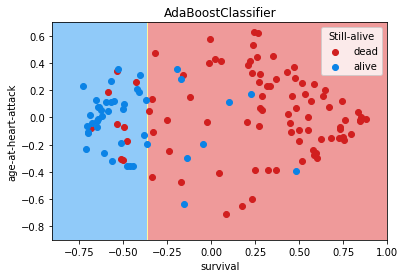

In [30]:
plot_decision_boundary(ada_clf, axis=[-0.9, 1, -0.9, 0.7])
plt.scatter(X[y==0,0], X[y==0,1], color='#d11f1f', label='dead')
plt.scatter(X[y==1,0], X[y==1,1], color='#0b83e6', label='alive')
plt.title('AdaBoostClassifier')
plt.xlabel(most_important_names[0])
plt.ylabel(most_important_names[1])
plt.legend(title='Still-alive')
plt.show()

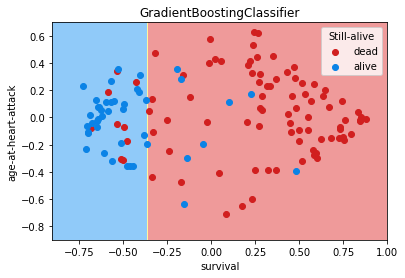

In [31]:
plot_decision_boundary(gb_clf, axis=[-0.9, 1, -0.9, 0.7])
plt.scatter(X[y==0,0], X[y==0,1], color='#d11f1f', label='dead')
plt.scatter(X[y==1,0], X[y==1,1], color='#0b83e6', label='alive')
plt.title('GradientBoostingClassifier')
plt.xlabel(most_important_names[0])
plt.ylabel(most_important_names[1])
plt.legend(title='Still-alive')
plt.show()